In [44]:
#!/usr/bin/env python
# coding: utf-8

import os
import os.path
import collections
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


FundDataPoint = collections.namedtuple('FundDataPoint', ['date', 'price', 'cap', 'pe_ttm'])


def parse_csv(csv_path):
    points = []
    with open(csv_path, 'r') as f:
        lines = f.readlines()
        for line in lines[1:-2]:
            cells = line.split(',')
            point = FundDataPoint(
                date=cells[0],
                price=float(cells[1]),
                cap=float(cells[2]),
                pe_ttm=float(cells[3]))
            points.append(point)
    return sorted(points, key=lambda p: p.date)


def calculate_fixed_invest_yield_rate(points, start_at, length, amount):
    invested_shares = 0
    invested_points = points[start_at:start_at+length]
    assert len(invested_points) == length
    for point in invested_points:
        invested_shares += amount / point.price
    last_price = invested_points[-1].price
    return ((last_price * invested_shares) - (amount * length)) / (amount * length)


def fixed_invest_by_iterations(points, length, amount):
    # 迭代随机选择时间，根据投资时间长度计算预期收益
    stop_at = len(points) - length
    rows = []
    for start_at in xrange(0, stop_at):
        yield_rate = calculate_fixed_invest_yield_rate(points, start_at, length, amount)
        row = {
            'start_date': points[start_at].date,
            'end_date': points[start_at+length].date,
            'rate': round(yield_rate, 2)}
        rows.append(row)
    return rows


def plot_by_fixed_invest_months_length(length):
    csv_path = os.getcwd() + '/hs300_pe_ttm_20180401_171619.csv'
    points_by_month = parse_csv(csv_path)

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    rows = fixed_invest_by_iterations(points_by_month, length, 1000)
    print 'percentage: ', float(sum([1 for r in rows if r['rate'] > 0])) / len(rows)
    xvals = [datetime.strptime(r['start_date'], '%Y-%m-%d') for r in rows]
    yvals = [r['rate'] for r in rows]
    ax1.plot(xvals, yvals, 'b-', linewidth=0.8)
    # ax.set_yticklabels(['{}%'.format(y*100) for y in yvals])
    ax1.set_ylabel('yield rate')
    ax1.xaxis.set_major_locator(mdates.YearLocator())
    ax1.xaxis.set_minor_locator(mdates.MonthLocator())
    ax1.grid(True)

    xvals = [datetime.strptime(p.date, '%Y-%m-%d') for p in points_by_month]
    yvals = [p.pe_ttm for p in points_by_month]
    ax2.plot(xvals, yvals, 'r-', linewidth=0.8)
    ax2.set_ylabel('pe ttm')
    plt.show()

percentage:  0.526315789474


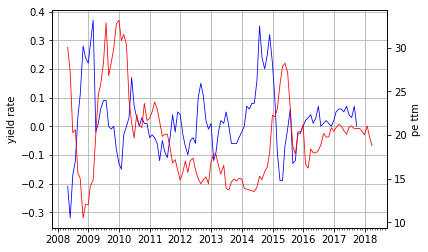

In [40]:
plot_by_fixed_invest_months_length(6)

percentage:  0.527777777778


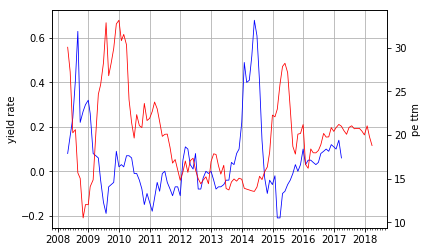

In [41]:
plot_by_fixed_invest_months_length(12)

percentage:  0.510416666667


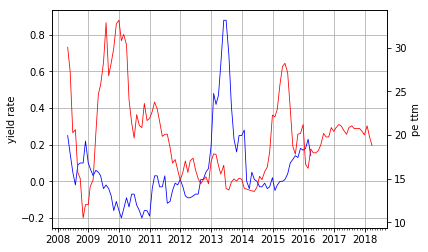

In [42]:
plot_by_fixed_invest_months_length(24)

percentage:  0.571428571429


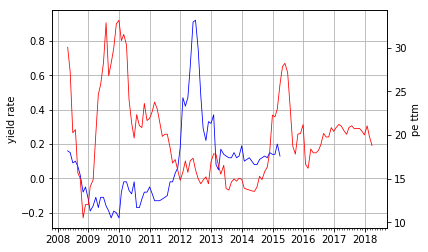

In [43]:
plot_by_fixed_invest_months_length(36)